In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
races = pd.read_csv('archive/races.csv')
results = pd.read_csv('archive/results.csv')
drivers = pd.read_csv('archive/drivers.csv')
constructors = pd.read_csv('archive/constructors.csv')

results = pd.merge(results, races[['raceId', 'year']], on='raceId')
podiums = results[results['positionOrder'].between(1,3)]
podiums.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008
22,23,19,8,6,1,2,1,1,1,10.0,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1,2008
23,24,19,9,2,4,4,2,2,2,8.0,56,+19.570,5498125,39,6,1:35.921,208.033,1,2008


In [3]:
driver_podiums = podiums.groupby('driverId').size().reset_index(name='podiums')
driver_podiums.sort_values(by='podiums', ascending=False, inplace=True)
driver_podiums = driver_podiums.merge(drivers[['driverId', 'surname', 'driverRef']], on='driverId')

In [4]:
driver_podiums.head()

,driverId,podiums,surname,driverRef
0,1,195,Hamilton,hamilton
1,30,155,Schumacher,michael_schumacher
2,20,122,Vettel,vettel
3,117,106,Prost,prost
4,4,104,Alonso,alonso


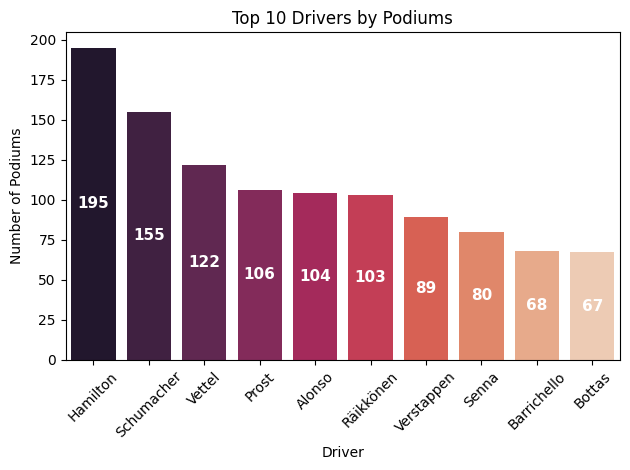

In [5]:
ax=sns.barplot(x='surname', y='podiums', data=driver_podiums.head(10), palette='rocket')

for i, v in enumerate(driver_podiums.head(10)['podiums']):
    ax.text(i, v/2, str(v), ha='center', va='center', fontweight='bold', fontsize=11, color='white')

plt.title('Top 10 Drivers by Podiums')
plt.xlabel('Driver')
plt.ylabel('Number of Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
const_podiums = podiums.groupby('constructorId').size().reset_index(name='podiums')
const_podiums.sort_values(by='podiums', ascending=False, inplace=True)
const_podiums = const_podiums.merge(constructors[['constructorId', 'name', 'constructorRef']], on='constructorId')
const_podiums.head()

,constructorId,podiums,name,constructorRef
0,6,813,Ferrari,ferrari
1,1,480,McLaren,mclaren
2,3,314,Williams,williams
3,131,286,Mercedes,mercedes
4,9,253,Red Bull,red_bull


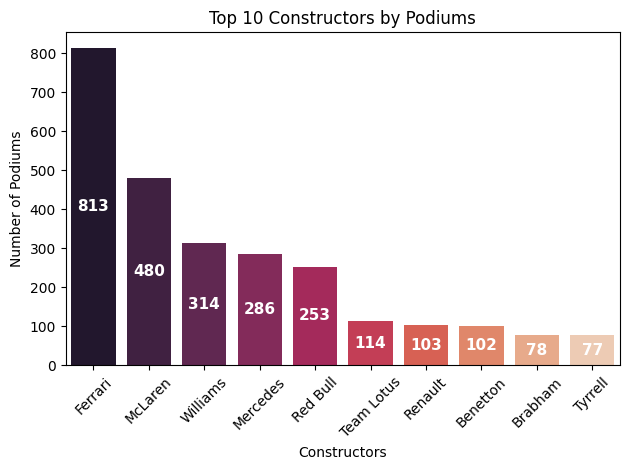

In [7]:
bx=sns.barplot(x='name', y='podiums', data=const_podiums.head(10), palette='rocket')

for i, v in enumerate(const_podiums.head(10)['podiums']):
    bx.text(i, v/2, str(v), ha='center', va='center', fontweight='bold', fontsize=11, color='white')

plt.title('Top 10 Constructors by Podiums')
plt.xlabel('Constructors')
plt.ylabel('Number of Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
driver_season_podiums = podiums.groupby(['driverId', 'year']).size().reset_index(name='podiums')
driver_season_podiums.sort_values(by=['driverId', 'year'], ascending=False, inplace=True)
driver_season_podiums = pd.merge(driver_season_podiums, drivers[['driverId', 'driverRef', 'surname']], on='driverId')
driver_season_podiums.head(10)

,driverId,year,podiums,driverRef,surname
0,848,2020,2,albon,Albon
1,847,2023,1,russell,Russell
2,847,2022,8,russell,Russell
3,847,2021,1,russell,Russell
4,846,2023,2,norris,Norris
5,846,2022,1,norris,Norris
6,846,2021,4,norris,Norris
7,846,2020,1,norris,Norris
8,844,2023,3,leclerc,Leclerc
9,844,2022,11,leclerc,Leclerc


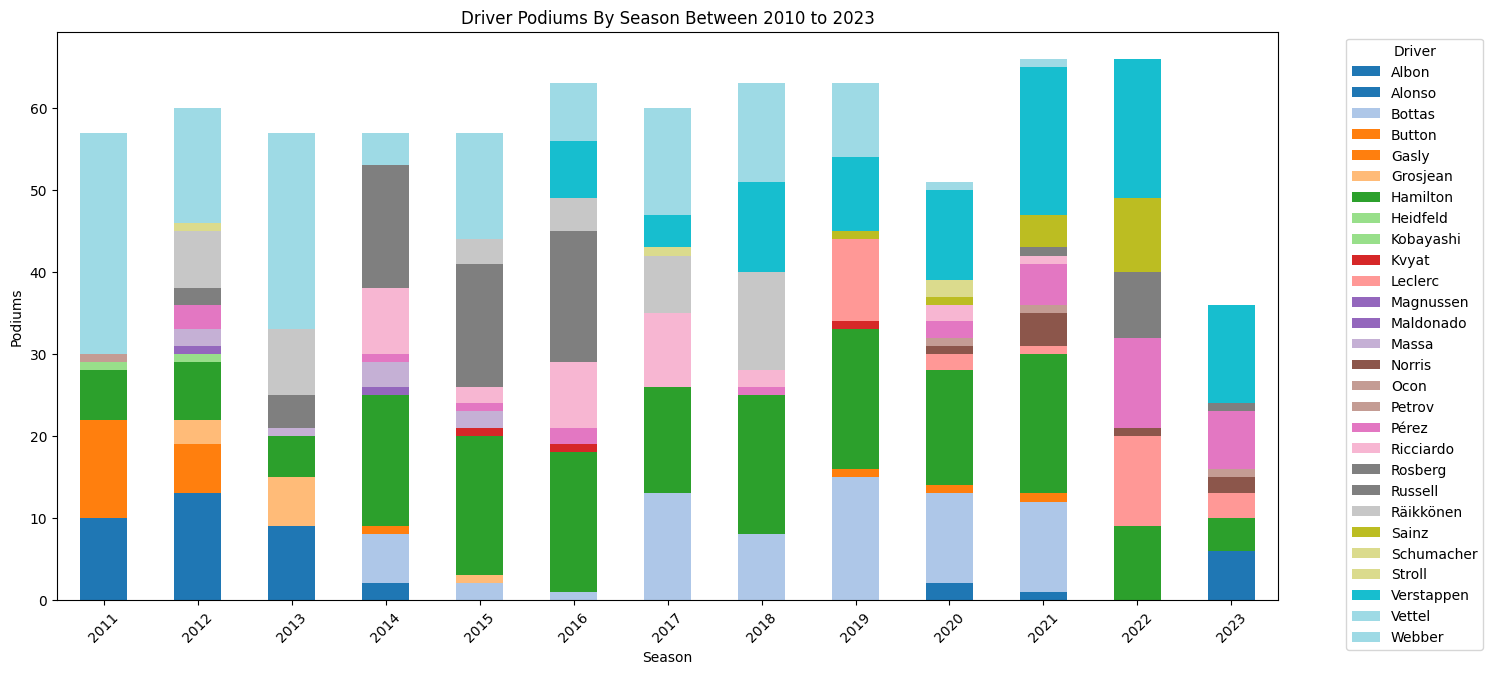

In [9]:
pivot = driver_season_podiums[driver_season_podiums['year'] > 2010].pivot_table(index='year', columns='surname', values='podiums', aggfunc='sum', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(15,7), colormap='tab20')
plt.title('Driver Podiums By Season Between 2010 to 2023')
plt.xlabel('Season')
plt.ylabel('Podiums')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
positions = results[results['positionOrder'].isin([1,2,3])]
position_counts = positions.groupby(['driverId', 'positionOrder']).size().unstack(fill_value=0)
position_counts = position_counts.merge(drivers[['driverId', 'driverRef', 'surname']], on='driverId')
position_counts.head(10)

,driverId,1,2,3,driverRef,surname
0,1,103,55,37,hamilton,Hamilton
1,2,0,8,5,heidfeld,Heidfeld
2,3,23,25,9,rosberg,Rosberg
3,4,32,39,33,alonso,Alonso
4,5,1,2,1,kovalainen,Kovalainen
5,8,21,37,45,raikkonen,Räikkönen
6,9,1,5,6,kubica,Kubica
7,10,0,2,1,glock,Glock
8,11,0,0,1,sato,Sato
9,12,0,1,0,piquet_jr,Piquet Jr.


In [13]:
position_counts.to_csv("position_counts.csv", index=False)

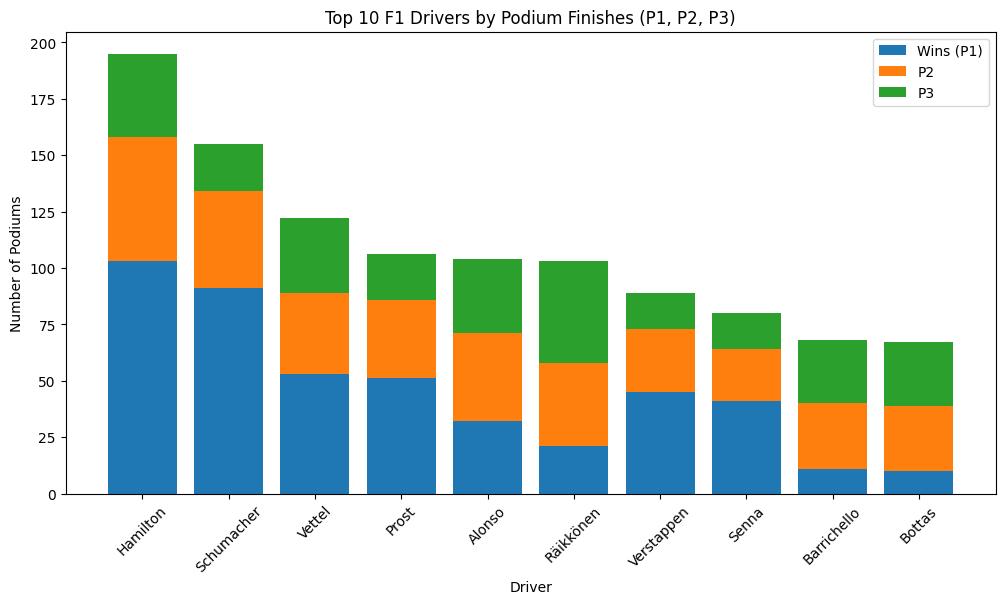

In [15]:
position_counts.columns = position_counts.columns.map(str)

# Add total podiums column
position_counts['total_podiums'] = position_counts['1'] + position_counts['2'] + position_counts['3']

# Get top 10 drivers by total podiums
top_drivers = position_counts.sort_values('total_podiums', ascending=False).head(10)

# Plot stacked bar chart
plt.figure(figsize=(12,6))
plt.bar(top_drivers['surname'], top_drivers['1'], label='Wins (P1)')
plt.bar(top_drivers['surname'], top_drivers['2'], bottom=top_drivers['1'], label='P2')
plt.bar(top_drivers['surname'], top_drivers['3'], bottom=top_drivers['1']+top_drivers['2'], label='P3')

plt.xlabel("Driver")
plt.ylabel("Number of Podiums")
plt.title("Top 10 F1 Drivers by Podium Finishes (P1, P2, P3)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


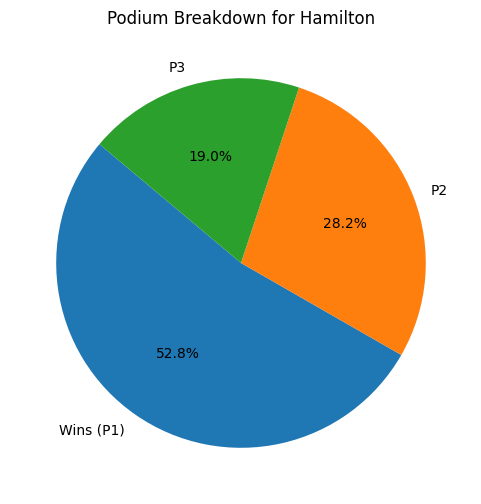

In [16]:

# 2. Pie chart of podium distribution for top driver (Hamilton)
hamilton = position_counts[position_counts['surname']=="Hamilton"].iloc[0]
labels = ['Wins (P1)','P2','P3']
sizes = [hamilton['1'], hamilton['2'], hamilton['3']]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title("Podium Breakdown for Hamilton")
plt.show()


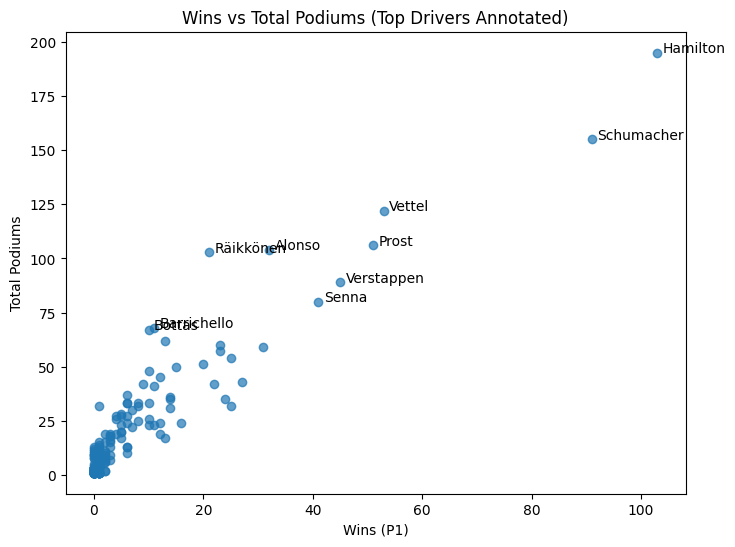

In [17]:
# 3. Scatter plot: Wins vs Total Podiums
plt.figure(figsize=(8,6))
plt.scatter(position_counts['1'], position_counts['total_podiums'], alpha=0.7)
for i, row in position_counts.nlargest(10, 'total_podiums').iterrows():
    plt.text(row['1']+1, row['total_podiums'], row['surname'])
plt.xlabel("Wins (P1)")
plt.ylabel("Total Podiums")
plt.title("Wins vs Total Podiums (Top Drivers Annotated)")
plt.show()

In [32]:
results.head()
g = results[results['year'] > 2019].assign(grid_bin=pd.cut(results['grid'], bins=[0,1,3,5,10,20,100], labels=['P1', 'P2-3', 'P4-5', 'P6-10', 'P11-20', '>P20']))
conv = g.groupby('grid_bin')
conv = conv['positionOrder'].apply(lambda s: (s.isin([1,2,3]).mean())).reset_index(name='podium_rate')
conv.head()

/var/folders/4w/0983xwzj4rjf72hxdhp98sxm0000gn/T/ipykernel_32510/2033447791.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv = g.groupby('grid_bin')


,grid_bin,podium_rate
0,P1,0.767123
1,P2-3,0.636986
2,P4-5,0.232877
3,P6-10,0.069061
4,P11-20,0.015759


posx and posy should be finite values
posx and posy should be finite values


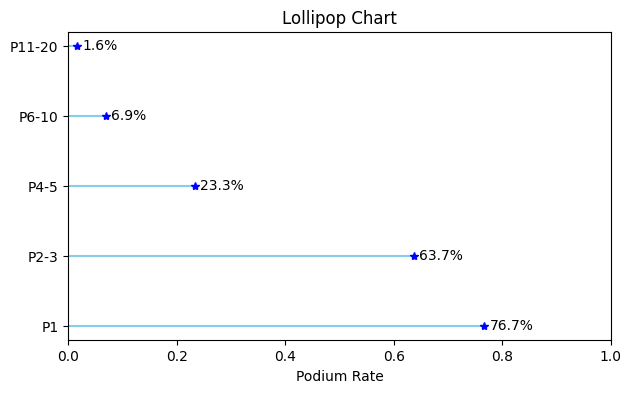

In [43]:
plt.figure(figsize=(7,4))
plt.hlines(y=conv["grid_bin"], xmin=0, xmax=conv["podium_rate"], color="skyblue")
plt.plot(conv["podium_rate"], conv["grid_bin"], "*", color="blue")

for x, y in zip(conv["podium_rate"], conv["grid_bin"]):
    plt.text(x+0.01, y, f"{x:.1%}", va="center")

plt.xlim(0, 1)
plt.xlabel("Podium Rate")
plt.title("Lollipop Chart")
plt.show()
